### 02. Recognize objects in the picture datasets provided along with this manuscript.
#### A.	[LO 2] Get HOG descriptors of the input image dataset and train using one of any machine learning model of your preferences.

First step is to import all needed libraries. Here, we are using HOG feature and SVM model, both provided by scikit-learn.
The other libraries are needed for image processing, such as OpenCV, os (directory processing), and matplotlib.

In [80]:
import cv2
import os
import numpy as np
import matplotlib.pyplot as plt
from skimage import exposure 
from skimage.feature import hog
from sklearn.model_selection import train_test_split
from sklearn import svm

Next, we will make the function to load the train images from provided folders. Since there are two categories of images we want to predict and both having the same directory structure, we created a function to minimize code rows.

Inside the function we will iterate the images from each category and storing the HOG of the images and the label of the images into two separated lists. 

In [81]:
def load_img_hog(folder_path): 
    list_img = []
    list_class = []

    for types in os.listdir(folder_path):
        path = f"{folder_path}/{types}"

        for images in os.listdir(path):
            img_path = f"{folder_path}/{types}/{images}"
            # print(img_path)
            img = cv2.imread(img_path)
            img = cv2.resize(img, (128*4, 64*4))

            hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2', channel_axis=2)
            list_img.append(hog_image)
            list_class.append(types)

    return list_img, list_class

After gathering the HOG of the images, we will fit the data into our model. Here, we are using the Support Vector Classifier with the linear kernel.

In [82]:
def LinearSVC(img_list, class_list):
    linear_svm = svm.SVC()
    linear_svm.fit(img_list, class_list)
    return linear_svm

##### Applying the functions for each category

Flowers

In [83]:
train_flowers_img, flowers_class = load_img_hog('02/input/flowers')

In [84]:
flower_pred_model = LinearSVC(train_flowers_img, flowers_class)

Items

In [85]:
train_items_img, items_class = load_img_hog('02/input/person_car_cup/')

In [86]:
item_pred_model = LinearSVC(train_items_img, items_class)

#### B.	[LO 3] Once the training process is completed, employ your trained model to detect the object prepared in “the test images” and comment on the results!

Now, we will read the test images and compute their HOG from each category. After that, we will also read the predicted result using our trained Linear SVC previously and store the result of the HOG images and the predicted labels into two separated lists.

In [87]:
def load_img_test(path, SVC):
    pred_img_list = []
    pred_class_list = []

    for image in os.listdir(path):
        img = cv2.imread(f"{path}/{image}")
        img = cv2.resize(img, (128*4, 64*4))
        hog_image = hog(img, orientations=9, pixels_per_cell=(8, 8), cells_per_block=(2, 2), block_norm='L2', channel_axis=2)
        pred = SVC.predict(hog_image.reshape(1, -1))[0]
        pred_img_list.append(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        pred_class_list.append(pred)

    return pred_img_list, pred_class_list


In [88]:
def plot_result(img_list, class_list):
    plt.figure(figsize=(12,7))
    for x, img in enumerate(img_list):
        plt.subplot(2,2,x+1)
        plt.imshow(img)
        plt.title(f"Prediction: {class_list[x]}")

    plt.show()

##### Applying the functions for each category

Flowers

In [89]:
test_flower_path = '02/test_images/flowers/'
flower_pred_img, flower_pred_list = load_img_test(test_flower_path, flower_pred_model)

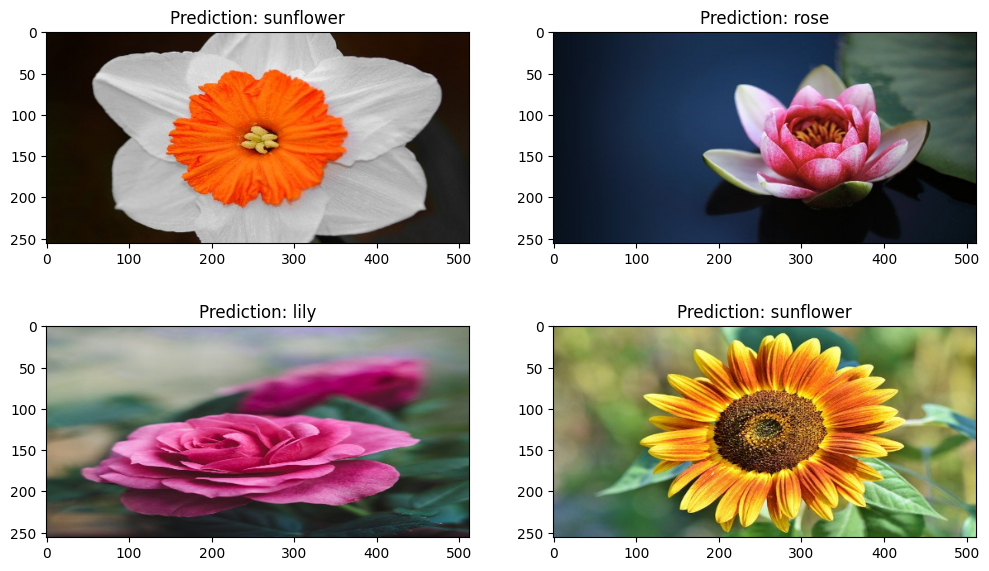

In [90]:
plot_result(flower_pred_img, flower_pred_list)

Items

In [91]:
test_item_path = '02/test_images/person_car_cup/'
item_pred_img, item_pred_list = load_img_test(test_item_path, item_pred_model)

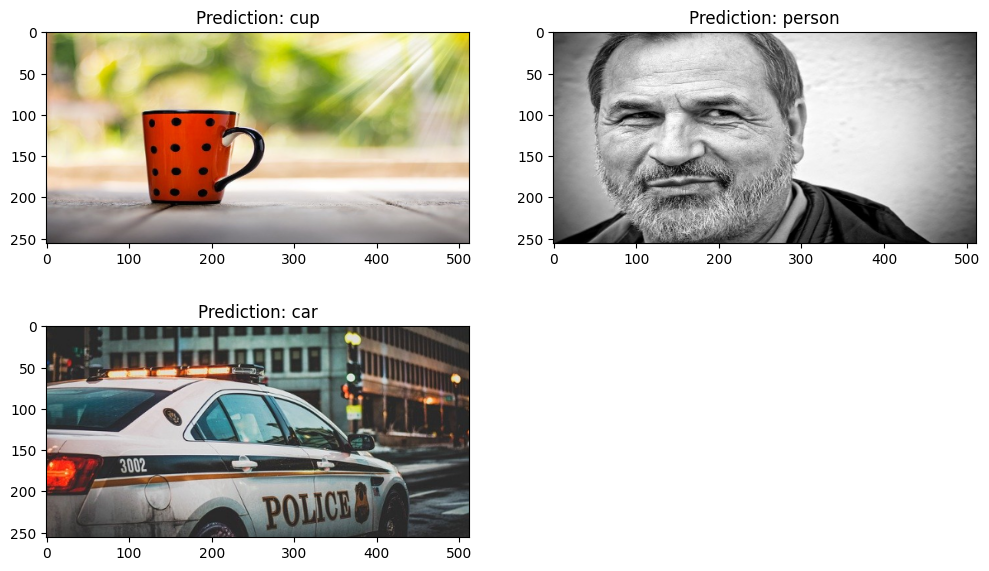

In [92]:
plot_result(item_pred_img, item_pred_list)

As we see above, the prediction model for flower category works relatively bad. Out of four test images [daffodil, lily, rose, sunflower] only one that has the correct output label [sunflower]. Meanwhile for the items category, this model works perfectly. All test images [cup, person, car] has all been labeled correctly [cup, person, car]. 